### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Bihar.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,21243632,10308300,10935332
1,1911,21567159,10516050,11051109
2,1921,21358905,10573105,10785800
3,1931,23438371,11748053,11690318
4,1941,26302771,13138759,13164012


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

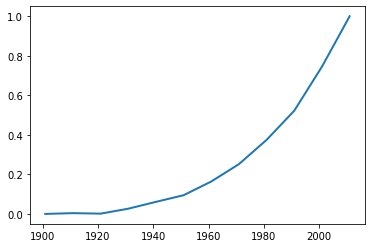

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9969108462925782

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.3088782905449534,
 1.6818653066964089,
 2.1224391444618504,
 2.6366934467675947]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.308878
13,2031,1.681865
14,2041,2.122439
15,2051,2.636693


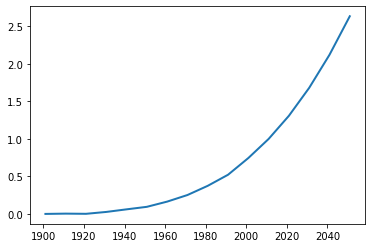

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


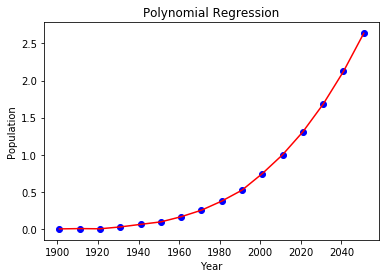

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[21243632.0,
 21567159.0,
 21358905.0,
 23438371.0,
 26302771.0,
 29085017.0,
 34840968.0,
 42126236.0,
 52302665.0,
 64530554.0,
 82998509.0,
 104099452.0,
 129691816.0,
 160595961.0,
 197100068.0,
 239709030.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,21243632.0
1,1911,21567159.0
2,1921,21358905.0
3,1931,23438371.0
4,1941,26302771.0
5,1951,29085017.0
6,1961,34840968.0
7,1971,42126236.0
8,1981,52302665.0
9,1991,64530554.0


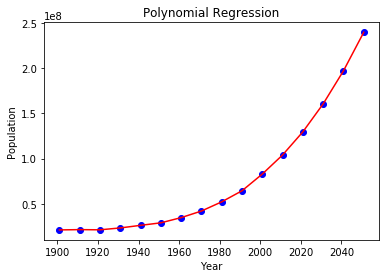

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.004725
2,1921,0.006022
3,1931,0.032744
4,1941,0.064373
5,1951,0.096376
6,1961,0.160727
7,1971,0.255230
8,1981,0.376208
9,1991,0.535138


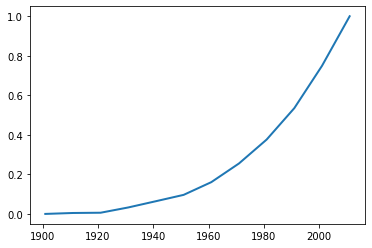

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9999661834222684

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.3115188124461383,
 1.6838312007407694,
 2.1235177440726147,
 2.6366510915272556]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.004725
2,1921,0.006022
3,1931,0.032744
4,1941,0.064373
5,1951,0.096376
6,1961,0.160727
7,1971,0.255230
8,1981,0.376208
9,1991,0.535138


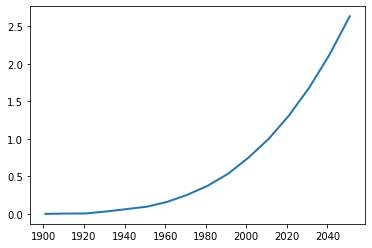

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

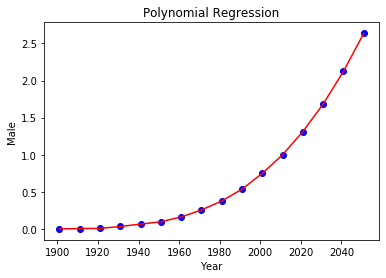

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[10308300.0,
 10516050.0,
 10573105.0,
 11748053.0,
 13138759.0,
 14545921.0,
 17375442.0,
 21530724.0,
 26850116.0,
 33838238.0,
 43243795.0,
 54278157.0,
 67975595.0,
 84346117.0,
 103679072.0,
 126241471.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,10308300.0
1,1911,10516050.0
2,1921,10573105.0
3,1931,11748053.0
4,1941,13138759.0
5,1951,14545921.0
6,1961,17375442.0
7,1971,21530724.0
8,1981,26850116.0
9,1991,33838238.0


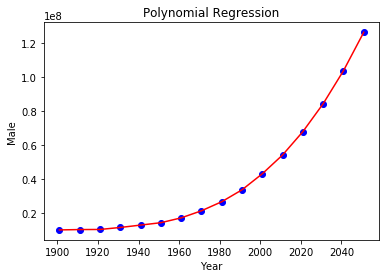

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.003831
1,1911,0.006797
2,1921,0.000000
3,1931,0.023172
4,1941,0.060924


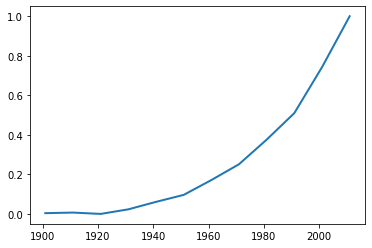

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.997729507308815

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.3047207791626079, 1.6770389118594267, 2.116924512660489, 2.6304715293956633]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.304721
13,2031,1.677039
14,2041,2.116925
15,2051,2.630472


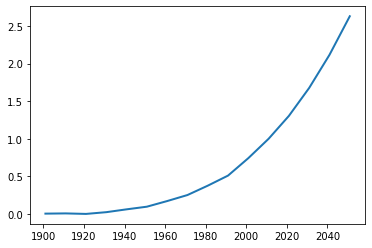

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

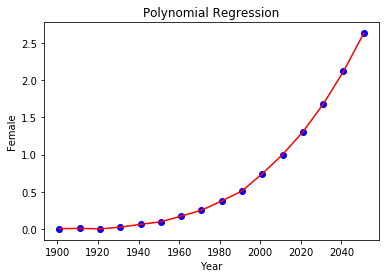

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[10935332.0,
 11051109.0,
 10785800.0,
 11690318.0,
 13164012.0,
 14539096.0,
 17465526.0,
 20595512.0,
 25452549.0,
 30692316.0,
 39754714.0,
 49821295.0,
 61716221.0,
 76249844.0,
 93420996.0,
 113467558.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,10935332.0
1,1911,11051109.0
2,1921,10785800.0
3,1931,11690318.0
4,1941,13164012.0
5,1951,14539096.0
6,1961,17465526.0
7,1971,20595512.0
8,1981,25452549.0
9,1991,30692316.0


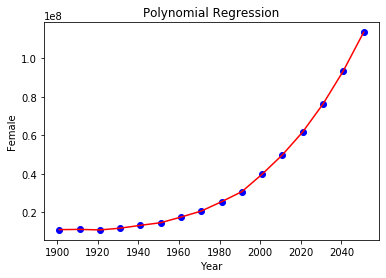

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [61]:
df4 = pd.concat([df1,df2,df3], axis=1)

In [62]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,21243632.0,1901,10308300.0,1901,10935332.0
1,1911,21567159.0,1911,10516050.0,1911,11051109.0
2,1921,21358905.0,1921,10573105.0,1921,10785800.0
3,1931,23438371.0,1931,11748053.0,1931,11690318.0
4,1941,26302771.0,1941,13138759.0,1941,13164012.0
5,1951,29085017.0,1951,14545921.0,1951,14539096.0
6,1961,34840968.0,1961,17375442.0,1961,17465526.0
7,1971,42126236.0,1971,21530724.0,1971,20595512.0
8,1981,52302665.0,1981,26850116.0,1981,25452549.0
9,1991,64530554.0,1991,33838238.0,1991,30692316.0
